In [7]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '1ab48cc6-d5a1-4c2d-98f3-7403337fe06f',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
#I go into Anaconda Prompt and enter this code to increase the data rate to allow to pull data:'jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10'

In [8]:
type(data)

dict

In [9]:
import pandas as pd
#This allows you to see all columns, not just like 15
pd.set_option('display.max_column', None)
#pd.set_option('display.max_rows', None)

In [10]:
# This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\rohit\AppData\Local\Temp\ipykernel_6516\1943330112.py:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10377,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.944151e+07,19441512,False,NaN,1,NaN,NaN,NaN,2023-07-28T15:43:00.000Z,29405.526766,1.178060e+10,-11.6264,-0.143732,0.280869,-1.539901,-3.400869,6.259580,0.213058,5.716879e+11,48.2072,6.175161e+11,NaN,2023-07-28T15:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-28 15:46:02.768042
1,1027,Ethereum,ETH,ethereum,7190,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207907e+08,120790729.685105,True,NaN,2,NaN,NaN,NaN,2023-07-28T15:43:00.000Z,1875.982388,4.145801e+09,-26.5728,-0.083220,0.333902,-0.819237,0.736898,-0.839063,-1.874174,2.266013e+11,19.1037,2.266013e+11,NaN,2023-07-28T15:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-28 15:46:02.768042
2,825,Tether USDt,USDT,tether,57999,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.382178e+10,86706257841.391861,True,NaN,3,NaN,NaN,NaN,2023-07-28T15:43:00.000Z,0.999656,1.843294e+10,-15.8155,-0.040955,-0.022840,-0.041710,-0.028408,-0.066316,-0.101414,8.379296e+10,7.0613,8.667645e+10,NaN,2023-07-28T15:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-28 15:46:02.768042
3,52,XRP,XRP,xrp,1014,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.269385e+10,99988556423,False,NaN,4,NaN,NaN,NaN,2023-07-28T15:43:00.000Z,0.712691,1.397855e+09,-16.4008,-0.373942,-0.383027,-8.074494,50.137140,48.360405,48.215225,3.755443e+10,3.1659,7.126910e+10,NaN,2023-07-28T15:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-28 15:46:02.768042
4,1839,BNB,BNB,bnb,1544,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538557e+08,153855749.824258,False,NaN,5,NaN,NaN,NaN,2023-07-28T15:43:00.000Z,241.808886,4.075941e+08,-17.4459,-0.236339,0.370824,-1.014223,2.889743,-23.014090,-25.205082,3.720369e+10,3.1363,3.720369e+10,NaN,2023-07-28T15:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-28 15:46:02.768042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,18897,Thought,THT,thought,4,2022-03-17T06:55:38.000Z,[],1.618034e+09,0.000000e+00,1218372200,False,NaN,4998,NaN,NaN,NaN,2023-07-28T15:43:00.000Z,0.005783,4.238524e+03,168.5230,3.831408,11.451522,56.392118,62.786477,44.127287,3.308756,0.000000e+00,0.0000,9.356854e+06,NaN,2023-07-28T15:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-28 15:46:02.768042
4996,22157,Battle For Giostone,BFG,battle-for-giostone,3,2022-10-12T06:26:38.000Z,[],1.500000e+08,0.000000e+00,150000000,False,NaN,4999,150000000.0,8.044954e+06,NaN,2023-07-28T15:43:00.000Z,0.053633,4.233700e+03,-82.4331,0.442454,-0.057805,-8.245321,-2.532085,0.568625,-0.570587,0.000000e+00,0.0000,8.044954e+06,NaN,2023-07-28T15:43:00.000Z,5805.0,Avalanche C-Chain,AVAX,avalanche,0xFd538CA3f58dC309dA55B11f007ff53fb4602876,2023-07-28 15:46:02.768042
4997,11842,PolkaFantasy,XP,polkafantasy,14,2021-09-13T06:35:12.000Z,[],2.000000e+08,0.000000e+00,14001000,False,NaN,5000,14664580.0,3.459889e+05,NaN,2023-07-28T15:43:00.000Z,0.023594,4.225399e+03,11.3581,-0.031918,-0.930218,-17.886528,-57.768400,-51.683720,-57.601192,0.000000e+00,0.0000,4.718701e+06,NaN,2023-07-28T15:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0x948c70Dc6169Bfb10

In [16]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'5000',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '1ab48cc6-d5a1-4c2d-98f3-7403337fe06f',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\rohit\OneDrive\04. Self Learning\Data Analytics\Python\API.csv'):
        df.to_csv(r'C:\Users\rohit\OneDrive\04. Self Learning\Data Analytics\Python\API.csv', header= 'column_names')
    else:
        df.to_csv(r'C:\Users\rohit\OneDrive\04. Self Learning\Data Analytics\Python\API.csv', mode='a', header= False)
#NOTE:
#I go into Anaconda Prompt and enter this code to increase the data rate to allow to pull data:'jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10'

In [17]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(60) #sleep for 1 miniute
exit()

C:\Users\rohit\AppData\Local\Temp\ipykernel_6516\616494669.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner Completed


C:\Users\rohit\AppData\Local\Temp\ipykernel_6516\616494669.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


API Runner Completed


KeyboardInterrupt: 

In [23]:
df = pd.read_csv(r'C:\Users\rohit\OneDrive\04. Self Learning\Data Analytics\Python\API.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10377,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19441512.00000,19441512.00000,False,NaN,1,NaN,NaN,NaN,2023-07-28T16:01:00.000Z,29378.93684,11785142398.46528,-11.53560,-0.35190,0.28027,-1.63132,-3.41804,6.37254,0.29520,571170953138.28479,48.16360,616957673657.47998,NaN,2023-07-28T16:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-28 16:03:47.333789
1,1,1027,Ethereum,ETH,ethereum,7190,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120790729.68511,120790729.68511,True,NaN,2,NaN,NaN,NaN,2023-07-28T16:01:00.000Z,1874.83257,4142014765.25924,-26.53480,-0.17914,0.32729,-0.86468,0.81133,-0.71357,-1.71530,226462394750.49649,19.09690,226462394750.50000,NaN,2023-07-28T16:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-28 16:03:47.333789
2,2,825,Tether USDt,USDT,tether,57999,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83821781092.11426,86706257841.39186,True,NaN,3,NaN,NaN,NaN,2023-07-28T16:01:00.000Z,1.00003,18364502226.63155,-16.33360,0.03924,0.01217,-0.02122,-0.00273,-0.00150,-0.06178,83824049687.64169,7.06760,86708604503.87000,NaN,2023-07-28T16:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-28 16:03:47.333789
3,3,52,XRP,XRP,xrp,1014,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,52693851493.00000,99988556423.00000,False,NaN,4,NaN,NaN,NaN,2023-07-28T16:01:00.000Z,0.71266,1309431631.34172,-26.15380,-0.34256,-1.29430,-8.12323,50.06445,48.65062,48.71559,37552717654.94923,3.16600,71265843340.25999,NaN,2023-07-28T16:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-28 16:03:47.333789
4,4,1839,BNB,BNB,bnb,1544,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153855749.82426,153855749.82426,False,NaN,5,NaN,NaN,NaN,2023-07-28T16:01:00.000Z,241.65403,403858488.32437,-18.04630,-0.26338,0.38986,-1.02238,2.78987,-22.89922,-25.19966,37179862734.96256,3.13460,37179862734.96000,NaN,2023-07-28T16:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-28 16:03:47.333789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4995,23554,Hongkong,HK,hongkong-token,5,2023-02-19T07:38:38.000Z,[],1000000000.00000,0.00000,1000000000.00000,False,NaN,4996,58499995.00000,1194087.57657,NaN,2023-07-28T16:03:00.000Z,0.02041,4243.01428,18.95770,0.00749,2.50578,0.22052,-36.30235,-33.22260,-12.26373,0.00000,0.00000,20411755.19000,NaN,2023-07-28T16:03:00.000Z,1839.00000,BNB Smart Chain (BEP20),BNB,bnb,0x57534804B9485209A2FC55698a0F2112AE389342,2023-07-28 16:04:49.151767
9996,4996,16943,Tomb Shares,TSHARE,tomb-shares,86,2022-01-06T09:15:03.000Z,['fantom-ecosystem'],70000.00000,0.00000,65585.00000,False,NaN,4997,39127.00000,885056.55031,NaN,2023-07-28T16:03:00.000Z,22.62010,4229.96234,10.63050,-0.13810,1.47725,-60.31724,-44.64852,-39.98941,-62.07188,0.00000,0.00000,1583406.82000,NaN,2023-07-28T16:03:00.000Z,3513.00000,Fantom,FTM,fantom,0x4cdf39285d7ca8eb3f090fda0c069ba5f4145b37,2023-07-28 16:04:49.151767
9997,4997,11842,PolkaFantasy,XP,polkafantasy,14,2021-09-13T06:35:12.000Z,[],200000000.00000,0.00000,14001000.00000,False,NaN,4998,14664580.00000,346092.45873,NaN,2023-07-28T16:03:00

In [24]:
# Numbers were in scientific notation. I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [25]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10377,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19441512.00000,19441512.00000,False,NaN,1,NaN,NaN,NaN,2023-07-28T16:01:00.000Z,29378.93684,11785142398.46528,-11.53560,-0.35190,0.28027,-1.63132,-3.41804,6.37254,0.29520,571170953138.28479,48.16360,616957673657.47998,NaN,2023-07-28T16:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-28 16:03:47.333789
1,1,1027,Ethereum,ETH,ethereum,7190,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120790729.68511,120790729.68511,True,NaN,2,NaN,NaN,NaN,2023-07-28T16:01:00.000Z,1874.83257,4142014765.25924,-26.53480,-0.17914,0.32729,-0.86468,0.81133,-0.71357,-1.71530,226462394750.49649,19.09690,226462394750.50000,NaN,2023-07-28T16:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-28 16:03:47.333789
2,2,825,Tether USDt,USDT,tether,57999,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83821781092.11426,86706257841.39186,True,NaN,3,NaN,NaN,NaN,2023-07-28T16:01:00.000Z,1.00003,18364502226.63155,-16.33360,0.03924,0.01217,-0.02122,-0.00273,-0.00150,-0.06178,83824049687.64169,7.06760,86708604503.87000,NaN,2023-07-28T16:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-28 16:03:47.333789
3,3,52,XRP,XRP,xrp,1014,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,52693851493.00000,99988556423.00000,False,NaN,4,NaN,NaN,NaN,2023-07-28T16:01:00.000Z,0.71266,1309431631.34172,-26.15380,-0.34256,-1.29430,-8.12323,50.06445,48.65062,48.71559,37552717654.94923,3.16600,71265843340.25999,NaN,2023-07-28T16:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-28 16:03:47.333789
4,4,1839,BNB,BNB,bnb,1544,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153855749.82426,153855749.82426,False,NaN,5,NaN,NaN,NaN,2023-07-28T16:01:00.000Z,241.65403,403858488.32437,-18.04630,-0.26338,0.38986,-1.02238,2.78987,-22.89922,-25.19966,37179862734.96256,3.13460,37179862734.96000,NaN,2023-07-28T16:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-28 16:03:47.333789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4995,23554,Hongkong,HK,hongkong-token,5,2023-02-19T07:38:38.000Z,[],1000000000.00000,0.00000,1000000000.00000,False,NaN,4996,58499995.00000,1194087.57657,NaN,2023-07-28T16:03:00.000Z,0.02041,4243.01428,18.95770,0.00749,2.50578,0.22052,-36.30235,-33.22260,-12.26373,0.00000,0.00000,20411755.19000,NaN,2023-07-28T16:03:00.000Z,1839.00000,BNB Smart Chain (BEP20),BNB,bnb,0x57534804B9485209A2FC55698a0F2112AE389342,2023-07-28 16:04:49.151767
9996,4996,16943,Tomb Shares,TSHARE,tomb-shares,86,2022-01-06T09:15:03.000Z,['fantom-ecosystem'],70000.00000,0.00000,65585.00000,False,NaN,4997,39127.00000,885056.55031,NaN,2023-07-28T16:03:00.000Z,22.62010,4229.96234,10.63050,-0.13810,1.47725,-60.31724,-44.64852,-39.98941,-62.07188,0.00000,0.00000,1583406.82000,NaN,2023-07-28T16:03:00.000Z,3513.00000,Fantom,FTM,fantom,0x4cdf39285d7ca8eb3f090fda0c069ba5f4145b37,2023-07-28 16:04:49.151767
9997,4997,11842,PolkaFantasy,XP,polkafantasy,14,2021-09-13T06:35:12.000Z,[],200000000.00000,0.00000,14001000.00000,False,NaN,4998,14664580.00000,346092.45873,NaN,2023-07-28T16:03:00

In [28]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,
Bitcoin,-0.31639,0.28749,-3.41748,6.42141,0.29620
Ethereum,-0.16022,0.32936,0.81414,-0.64939,-1.71477
Tether USDt,0.03719,0.01890,0.00496,0.00665,-0.06210
XRP,-0.34528,-1.29410,50.05602,48.65321,48.71871
BNB,-0.26315,0.38731,2.78931,-22.89217,-25.20110
...,...,...,...,...,...
Hoichi,1.29890,3.95567,-19.65725,-19.42458,-45.22370
Tomb Shares,-0.09858,1.50493,-44.61108,-39.98962,-62.05047
PokerFI.Finance,-2.26411,-0.22002,-4.57205,-9.53097,-36.90421


In [29]:
df4 = df3.stack()
df4

name                                  
Bitcoin   quote.USD.percent_change_1h     -0.31639
          quote.USD.percent_change_24h     0.28749
          quote.USD.percent_change_30d    -3.41748
          quote.USD.percent_change_60d     6.42141
          quote.USD.percent_change_90d     0.29620
                                            ...   
Unipilot  quote.USD.percent_change_1h     -3.19989
          quote.USD.percent_change_24h    -3.79971
          quote.USD.percent_change_30d   -40.09973
          quote.USD.percent_change_60d   -47.60921
          quote.USD.percent_change_90d   -58.83761
Length: 24885, dtype: float64

In [31]:
type(df4)

pandas.core.series.Series

In [32]:
df5 = df4.to_frame(name='values')
df5

values
name                                           
Bitcoin  quote.USD.percent_change_1h   -0.31639
         quote.USD.percent_change_24h   0.28749
         quote.USD.percent_change_30d  -3.41748
         quote.USD.percent_change_60d   6.42141
         quote.USD.percent_change_90d   0.29620
...                                         ...
Unipilot quote.USD.percent_change_1h   -3.19989
         quote.USD.percent_change_24h  -3.79971
         quote.USD.percent_change_30d -40.09973
         quote.USD.percent_change_60d -47.60921
         quote.USD.percent_change_90d -58.83761

[24885 rows x 1 columns]

In [35]:
#type(df5)
df5.count()

values    24885
dtype: int64

In [37]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(24885))
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.31639
1,Bitcoin,quote.USD.percent_change_24h,0.28749
2,Bitcoin,quote.USD.percent_change_30d,-3.41748
3,Bitcoin,quote.USD.percent_change_60d,6.42141
4,Bitcoin,quote.USD.percent_change_90d,0.29620
...,...,...,...
24880,Unipilot,quote.USD.percent_change_1h,-3.19989
24881,Unipilot,quote.USD.percent_change_24h,-3.79971
24882,Unipilot,quote.USD.percent_change_30d,-40.09973
24883,Unipilot,quote.USD.percent_change_60d,-47.60921


In [38]:
# Change the column name
df7 = df6.rename(columns = {'level_1' : 'percentage change'})
df7

,name,percentage change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.31639
1,Bitcoin,quote.USD.percent_change_24h,0.28749
2,Bitcoin,quote.USD.percent_change_30d,-3.41748
3,Bitcoin,quote.USD.percent_change_60d,6.42141
4,Bitcoin,quote.USD.percent_change_90d,0.29620
...,...,...,...
24880,Unipilot,quote.USD.percent_change_1h,-3.19989
24881,Unipilot,quote.USD.percent_change_24h,-3.79971
24882,Unipilot,quote.USD.percent_change_30d,-40.09973
24883,Unipilot,quote.USD.percent_change_60d,-47.60921


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
sns.catplot(x='percentage change', y='values', hue = 'name', data=df7, kind='point')

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001D33A370670> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001D33B47CE50> (for post_execute):



KeyboardInterrupt



In [43]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want


df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,29378.93684,2023-07-28 16:03:47.333789
5000,Bitcoin,29381.66543,2023-07-28 16:04:49.151767


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

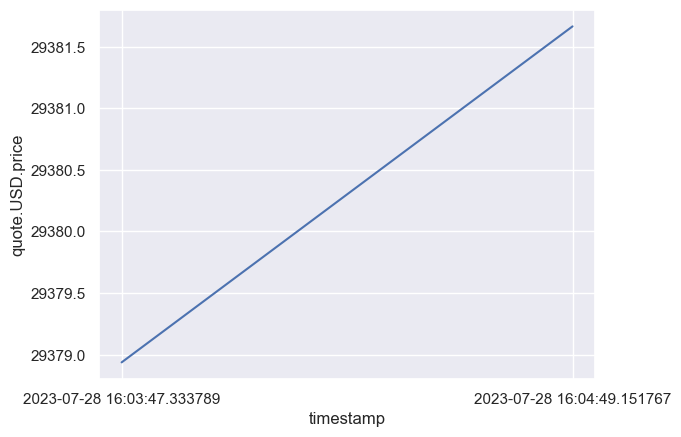

In [44]:
sns.set_theme(style='darkgrid')

sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df10)